<a href="https://colab.research.google.com/github/SHRUTIGARG90567/-4_MODEL_TRAINING/blob/main/9%20EARLY%20STOPPING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [45]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1) #  we have made our own classification data

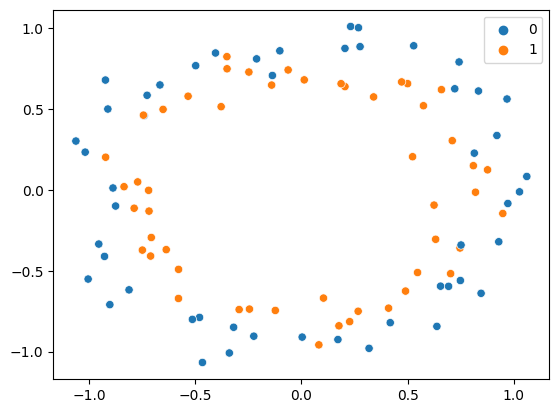

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the first feature of X on the x-axis
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [48]:
model = Sequential()  # here we have made a keras model which have one hidden layer and 256 rows

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
# to compile the model we need this three thing

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)  # we have fit the data

In [52]:
#  since the above model is fit is so long it is complex here is an alternave way

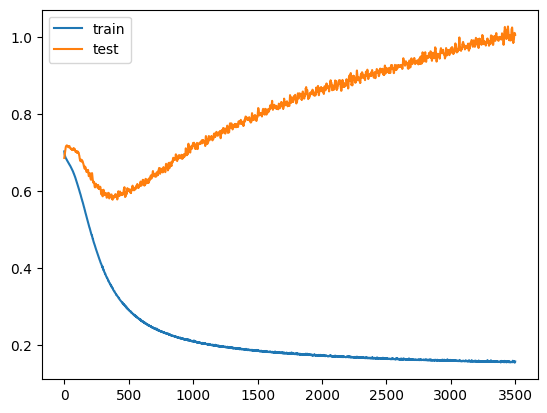

In [53]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [54]:
# here as we can see that in this  the test data have correct no of epoch is around 350 somewhat and on incressing the no we can see the  overfitng is incresed

In [55]:


#  here we are detecting the training and then we are able to  see the overfiting and this is known as the period of early stopping

9600/9600 [==============================] - 8s 856us/step


TypeError: ignored

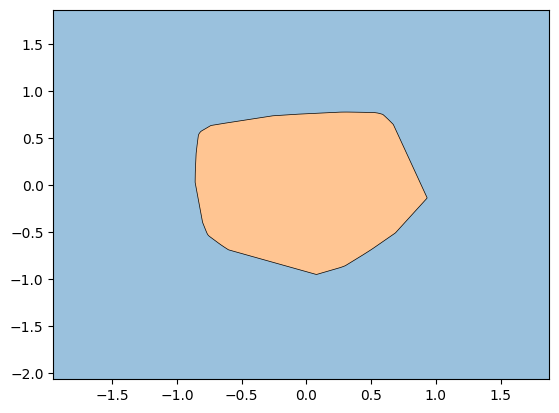

In [56]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()


### EARLY STOPPING

In [58]:
# HERE WE HAVE DIFINE THE MODEL

In [59]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
# CRating the early stopping object and then putiinng the values from the keras

In [62]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [63]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 92ms/step - loss: 0.6968 - accuracy: 0.4625 - val_loss: 0.6990 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6941 - accuracy: 0.5125 - val_loss: 0.7010 - val_accuracy: 0.3000
Epoch 3/3500
3/3 [==============================] - 0s 18ms/step - loss: 0.6926 - accuracy: 0.5250 - val_loss: 0.7034 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6909 - accuracy: 0.5375 - val_loss: 0.7057 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6898 - accuracy: 0.5375 - val_loss: 0.7073 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.6891 - accuracy: 0.5500 - val_loss: 0.7086 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.7097 - val_accuracy: 0.4500
Epoch 8/3500


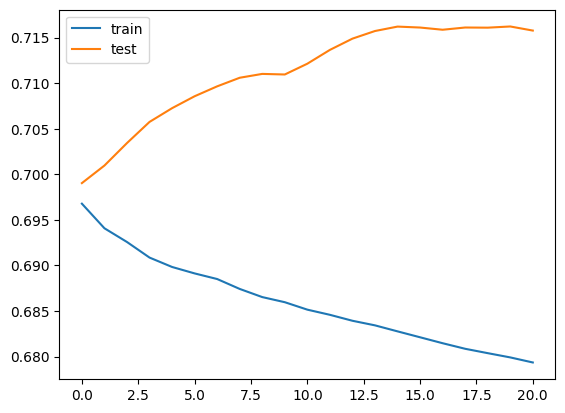

In [66]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()